In [39]:
# find lastest panorama image from google street view
import os
from streetview import search_panoramas,get_panorama
import cv2
from omnicv import fisheyeImgConv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def get_latest_pano_id(panoramas):
    if not panoramas:
        return None
    
    valid_panoramas = sorted(
        (pano for pano in panoramas if pano.date is not None),
        key=lambda p: p.date,
        reverse=True
    )
    
    if valid_panoramas:
        return valid_panoramas[0]
    else:
        return panoramas[0]

def getPanoID(lat, lon):
    try:
        panoramas = search_panoramas(lat=lat, lon=lon)
        pano = get_latest_pano_id(panoramas)
        return pano.pano_id, pano.lat, pano.lon, pano.date 
    except:
        return None

def getPanorama(pano_id, lat, lon, date):
    try:
        pano = get_panorama(pano_id=pano_id)
        pano_path = os.path.join(os.getcwd(), 'img', f'pano_@{pano_id}@{lat}@{lon}@{date}@.jpg')
        pano.save(pano_path, "jpeg")

        return pano_path
    except:
        return None

def cropPanorama(pano_path, pano_id, lat, lon, date):
    try:
        image = cv2.imread(pano_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        x, y, w, h = cv2.boundingRect(contours[0])
        crop_image = image[y:y+h, x:x+w]
        crop_path = os.path.join(os.getcwd(), 'img', f'crop_@{pano_id}@{lat}@{lon}@{date}@.jpg')
        cv2.imwrite(crop_path, crop_image)
        return crop_path
    except:
        return None

def changeToFisheye(pano_path, pano_id, lat, lon, date):
    try:
        equiRect = cv2.imread(pano_path)
        outShape = [5048,5048]
        mapper = fisheyeImgConv()
        fisheye = mapper.equirect2Fisheye(equiRect,outShape=outShape,f=1600,angles=[100,50,0])
        fe_path = os.path.join(os.getcwd(), 'img', f'fe_@{pano_id}@{lat}@{lon}@{date}@.jpg')
        cv2.imwrite(fe_path, fisheye)
        return fe_path
    except:
        return None

def showImage(pano_path, crop_path, feye_path):
    try:
        plt.figure(figsize=(15,5))  

        plt.subplot(1, 3, 1) 
        img = mpimg.imread(pano_path)
        plt.imshow(img)
        plt.axis('off')

        plt.subplot(1, 3, 2)  
        img = mpimg.imread(crop_path)
        plt.imshow(img)
        plt.axis('off')

        plt.subplot(1, 3, 3) 
        img = mpimg.imread(feye_path)
        plt.imshow(img)
        plt.axis('off')

        plt.show()
    except:
        print('Failed to show image')

if __name__ == '__main__':
    latLng = [(18.80322604063747, 98.95020624026014),
              (18.80409042354406, 98.95267978867928),
              (18.804455644749574, 98.95406876396386),
              (18.80707568953787, 98.95735167813076),
              (18.803163718220073, 98.95929370025283),
              (18.802320564480837, 98.96607334366405),
              (18.798533293867514, 98.96677671821367),
              (18.79648724856904, 98.97691060342076),
              (18.795743245954508, 98.98486737617445),
              (18.79406431529187, 98.98737700754616),
              (18.791474013175467, 98.98215720003668),
              (18.789024054151245, 98.9744382313473),
              (18.789431445831408, 98.96876486636566),
              (18.778059272703235, 98.97690323505478)]
    for i in latLng:
        lat = i[0]
        lng = i[1]
        pano_id, lat, lon, date = getPanoID(lat, lng)
        print(pano_id, lat, lon, date)
        pano_path = getPanorama(pano_id, lat, lon, date) if pano_id else print('Failed to get pano_id')
        crop_path = cropPanorama(pano_path, pano_id, lat, lon, date) if pano_path else print('Failed to download panorama')
        feye_path = changeToFisheye(crop_path, pano_id, lat, lon, date) if crop_path else print('Failed to crop image')
        # showImage(pano_path, crop_path, feye_path)



pano_id='FcErpTIJwJS6v0-bZi2-ag' lat=18.80318633264847 lon=98.9501662721865 heading=100.134765625 pitch=88.27973937988281 roll=359.3967895507812 date='2021-05'
FcErpTIJwJS6v0-bZi2-ag 18.80318633264847 98.9501662721865 2021-05


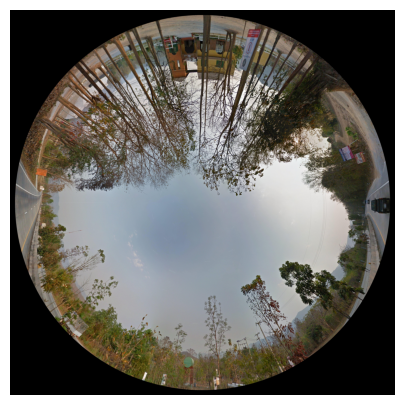

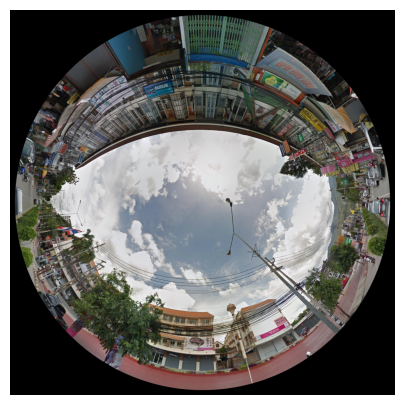

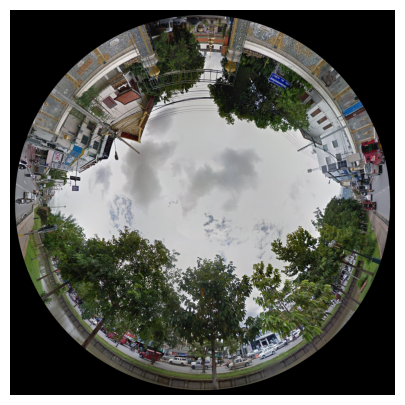

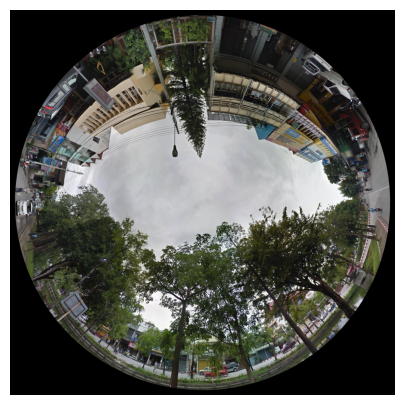

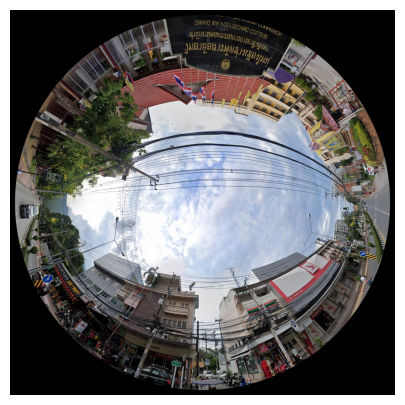

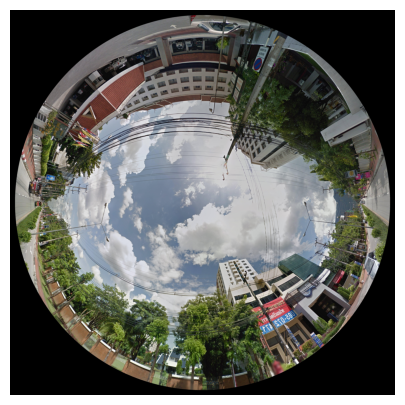

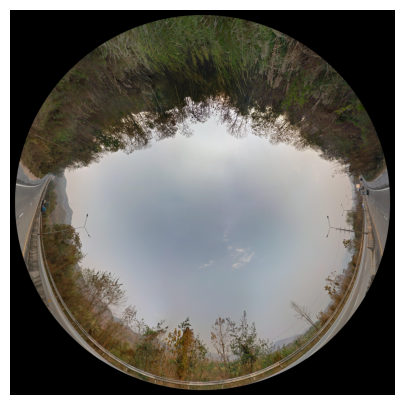

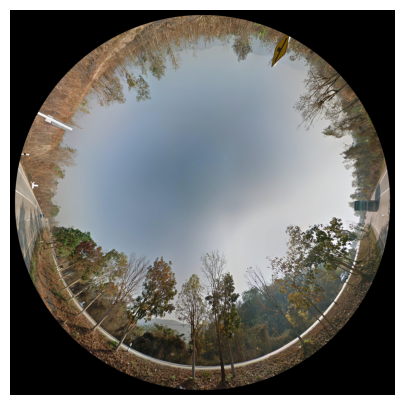

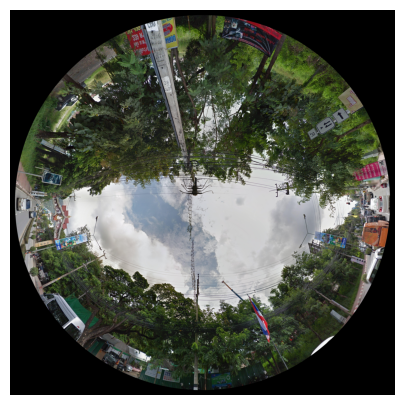

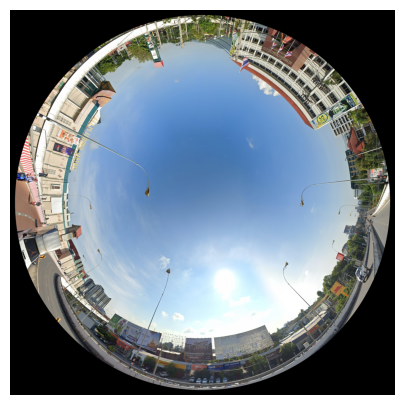

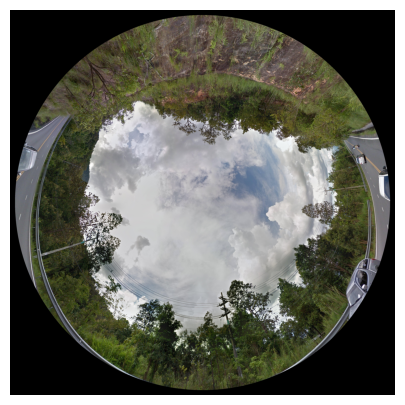

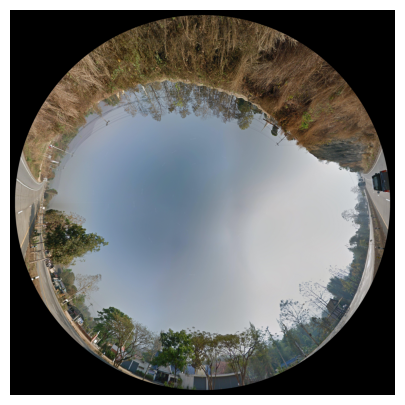

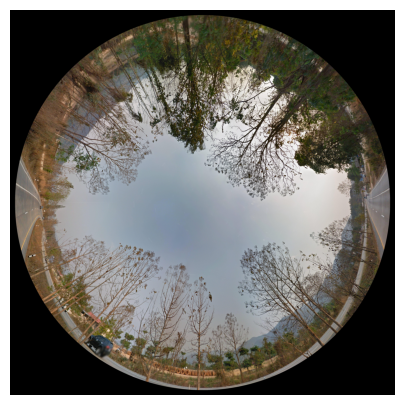

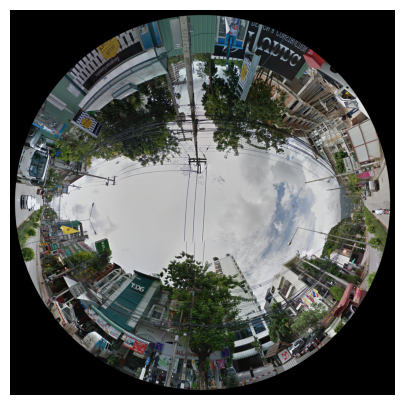

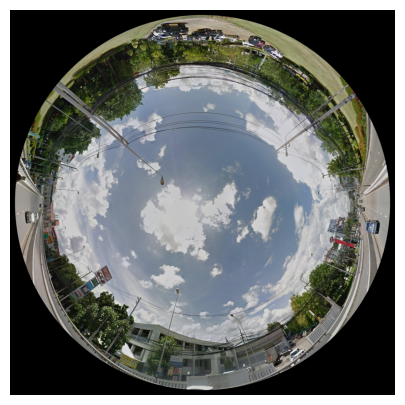

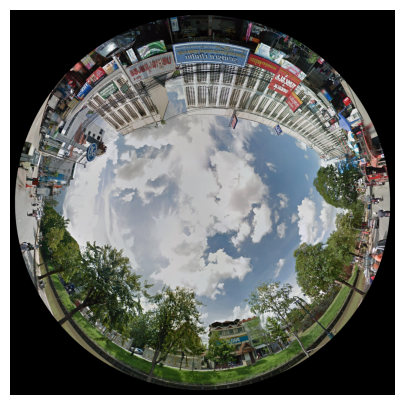

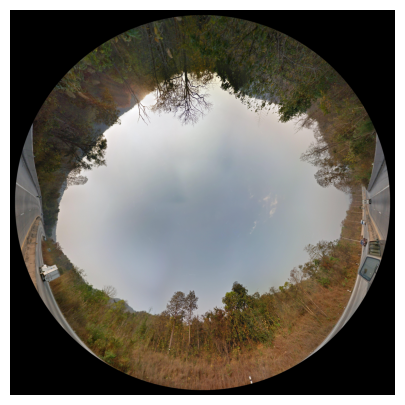

In [131]:
# fine tune fisheye
from omnicv import fisheyeImgConv
def changeToFisheye(pano_path, pano_id, lat, lon, date):
    try:
        equiRect = cv2.imread(pano_path)
        outShape = [5048,5048]
        mapper = fisheyeImgConv()
        # fisheye = mapper.equirect2Fisheye(equiRect,outShape=outShape,f=1650,angles=[100,50,0])
        # fisheye = mapper.equirect2Fisheye_EUCM(equiRect,outShape=outShape,f=1024,a_=0.4,b_=0.9,angles=[90,45,0])
        fisheye = mapper.equirect2Fisheye_DS(equiRect,outShape=outShape,f=1100,a_=0.4,xi_=0.2,angles=[90,45,0])

        fe_path = os.path.join(os.getcwd(), 'img', 'fe', f'fe_@{pano_id}@{lat}@{lon}@{date}@.jpg')
        cv2.imwrite(fe_path, fisheye)
        return fe_path
    except:
        return None
    
def showImage(feye_path):
    try:
        plt.figure(figsize=(15,5))  
        img = mpimg.imread(feye_path)
        plt.imshow(img)
        plt.axis('off')

        plt.show()
    except:
        print('Failed to show image')

# list in folder
for filename in os.listdir('img'):
    if filename.endswith('png'):
        pano_path = os.path.join(os.getcwd(), 'img', filename)
        pano_id=filename
        lat=18.80318633264847 
        lon=98.9501662721865
        fe_path = changeToFisheye(pano_path, pano_id, lat, lon, date)
        showImage(fe_path)

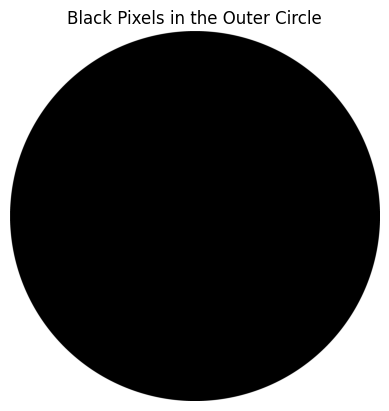

In [8]:
# count pixel in fisheye image
import cv2
import numpy as np
import os

# Load the image
image_path = os.path.join(os.getcwd(), 'img', 'fe', 'fe_@5cddafb39b3bcf2cbd3eefc08459233b.png@18.80318633264847@98.9501662721865@2021-05@.jpg') 
image = cv2.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

black_mask = gray == 0

total_pixels = image.shape[0] * image.shape[1]
black_pixels = np.sum(black_mask)

height, width = gray.shape
center = (width // 2, height // 2)
radius = min(center[0], center[1])

Y, X = np.ogrid[:height, :width]
dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2)
outer_circle_mask = dist_from_center >= radius

black_pixels_outer_circle = np.sum(black_mask & outer_circle_mask)

total_pixels, black_pixels, black_pixels_outer_circle

# show outer_circle_mask image
output_image = np.zeros_like(image)

# Set the pixels corresponding to the black pixels in the outer circle to white in the output image
output_image[black_mask & outer_circle_mask] = [255, 255, 255]

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Black Pixels in the Outer Circle')
plt.axis('off')
plt.show()



In [ ]:
# original version
import os
from streetview import search_panoramas,get_panorama
import cv2
from omnicv import fisheyeImgConv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def getPanoID(lat, lon):
    try:
        panos = search_panoramas(lat=lat, lon=lon)
        pano_id = panos[0].pano_id
        return pano_id  
    except:
        return None

def getPanorama(pano_id):
    try:
        pano = get_panorama(pano_id=pano_id)
        pano_path = os.path.join(os.getcwd(), 'img', 'pano_'+pano_id+'.jpg')
        pano.save(pano_path, "jpeg")

        return pano_path
    except:
        return None

def cropPanorama(pano_path,pano_id):
    try:
        image = cv2.imread(pano_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        x, y, w, h = cv2.boundingRect(contours[0])
        crop_image = image[y:y+h, x:x+w]
        crop_path = os.path.join(os.getcwd(), 'img', 'crop_'+pano_id+'.jpg')
        cv2.imwrite(crop_path, crop_image)
        return crop_path
    except:
        return None

def changeToFisheye(pano_path, pano_id):
    try:
        equiRect = cv2.imread(pano_path)
        outShape = [5048,5048]
        mapper = fisheyeImgConv()
        fisheye = mapper.equirect2Fisheye(equiRect,outShape=outShape,f=1600,angles=[100,50,0])
        fe_path = os.path.join(os.getcwd(), 'img', 'fe_'+pano_id+'.jpg')
        cv2.imwrite(fe_path, fisheye)
        return fe_path
    except:
        return None

def showImage(pano_path, crop_path, feye_path):
    try:
        plt.figure(figsize=(15,5))  

        plt.subplot(1, 3, 1) 
        img = mpimg.imread(pano_path)
        plt.imshow(img)
        plt.axis('off')

        plt.subplot(1, 3, 2)  
        img = mpimg.imread(crop_path)
        plt.imshow(img)
        plt.axis('off')

        plt.subplot(1, 3, 3) 
        img = mpimg.imread(feye_path)
        plt.imshow(img)
        plt.axis('off')

        plt.show()
    except:
        print('Failed to show image')

if __name__ == '__main__':
    latLng = [(18.80322604063747, 98.95020624026014),
              (18.80409042354406, 98.95267978867928),
              (18.804455644749574, 98.95406876396386),
              (18.80707568953787, 98.95735167813076),
              (18.803163718220073, 98.95929370025283),
              (18.802320564480837, 98.96607334366405),
              (18.798533293867514, 98.96677671821367),
              (18.79648724856904, 98.97691060342076),
              (18.795743245954508, 98.98486737617445),
              (18.79406431529187, 98.98737700754616),
              (18.791474013175467, 98.98215720003668),
              (18.789024054151245, 98.9744382313473),
              (18.789431445831408, 98.96876486636566),
              (18.778059272703235, 98.97690323505478)]
    for i in latLng:
        lat = i[0]
        lng = i[1]
        pano_id = getPanoID(lat, lng)
        pano_path = getPanorama(pano_id) if pano_id else print('Failed to get pano_id')
        crop_path = cropPanorama(pano_path, pano_id) if pano_path else print('Failed to download panorama')
        feye_path = changeToFisheye(crop_path, pano_id) if crop_path else print('Failed to crop image')
        showImage(pano_path, crop_path, feye_path)

